## Using RNNs to classify sentiment on IMDB data

In this assignment,you will train three types of RNNs:  "vanilla" RNN, LSTM and GRU to predict the sentiment on IMDB reviews.  

Keras provides a convenient interface to load the data and immediately encode the words into integers (based on the most common words). 
This will save you a lot of the drudgery that is usually involved when working with raw text.

The IMDB is  data consists of 25000 training sequences and 25000 test sequences. 
The outcome is binary (positive/negative) and both outcomes are equally represented in both the training and the test set.


Walk through the followinng steps to prepare the data and the building of an RNN model. 

In [1]:
from keras.datasets import imdb
maxlen=30
num_words=20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


1- Use the `imdb.load_data()` to load in the data 

2- Specify the maximum length of a sequence to 20000 words and the pick the most common words to 30. 

In [2]:
print("x_train = ", len(x_train))
print("x_test = ", len(x_test))

x_train =  25000
x_test =  25000


3- Check that the number of sequences in train and test datasets are equal (default split):
    
Expected output:
- `x_train = 25000 train sequences`

- `x_test = 25000 test sequences`

In [3]:
from keras.preprocessing import sequence

4- Pad (or truncate) the sequences so that they are of the maximum length

In [4]:

x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

5- After padding or truncating, check the dimensionality of x_train and x_test.

Expected output:
- `x_train shape: (25000, 30)`
- `x_test shape: (25000, 30)`

In [5]:
print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

x_train shape: (25000, 30)
x_test shape: (25000, 30)


## Keras layers for (Vanilla) RNNs

In this step, you will not use pre-trained word vectors, Instead you will learn an embedding as part of the  the Vanilla) RNNs network  Neural Network. 

In the Keras API documentation, the Embedding Layer and the SimpleRNN Layer have the following syntax:

### Embedding Layer
`keras.layers.embeddings.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)`

- This layer maps each integer into a distinct (dense) word vector of length `output_dim`.
- Can think of this as learning a word vector embedding "on the fly" rather than using an existing mapping (like GloVe)
- The `input_dim` should be the size of the vocabulary.
- The `input_length` specifies the length of the sequences that the network expects.

### SimpleRNN Layer
`keras.layers.recurrent.SimpleRNN(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)`

- This is the basic RNN, where the output is also fed back as the "hidden state" to the next iteration.
- The parameter `units` gives the dimensionality of the output (and therefore the hidden state).  Note that typically there will be another layer after the RNN mapping the (RNN) output to the network output.  So we should think of this value as the desired dimensionality of the hidden state and not necessarily the desired output of the network.
- Recall that there are two sets of weights, one for the "recurrent" phase and the other for the "kernel" phase.  These can be configured separately in terms of their initialization, regularization, etc.






6- Build the RNN with three layers: 
- The SimpleRNN layer with 5 neurons and initialize its kernel with stddev=0.001

- The Embedding layer and initialize it by setting the word embedding dimension to 50. This means that this layer takes each integer in the sequence and embeds it in a 50-dimensional vector.

-  The output layer has the sigmoid activation function.

In [6]:
#embedding_size=32
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense,SimpleRNN,Embedding, LSTM
from keras import initializers
model=Sequential()
model.add(Embedding(num_words, 50))
model.add(SimpleRNN(5, kernel_initializer=initializers.RandomNormal(stddev=0.001)))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 280       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 1,000,286
Trainable params: 1,000,286
Non-trainable params: 0
_________________________________________________________________
None


7- How many parameters have the embedding layer?

**The embedding layer has 1,000,000 parameters.**

8- Train the network with the RMSprop with learning rate of .0001 and epochs=10.

In [9]:
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [10]:

history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split = 0.2
                    )

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5825 - acc: 0.7009 - val_loss: 0.7277 - val_acc: 0.5388
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5677 - acc: 0.7153 - val_loss: 0.7386 - val_acc: 0.5372
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5546 - acc: 0.7237 - val_loss: 0.7413 - val_acc: 0.5422
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5421 - acc: 0.7334 - val_loss: 0.7473 - val_acc: 0.5496
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5304 - acc: 0.7422 - val_loss: 0.7536 - val_acc: 0.5480
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5192 - acc: 0.7502 - val_loss: 0.7601 - val_acc: 0.5456
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5089 - acc: 0.7578 - val_loss: 0.7636 - val_acc: 0.5490
Epoch 8/10
625/625 [==============================] - 6s 10ms/step - l

In [11]:
history.history

{'loss': [0.5824746489524841,
  0.5676908493041992,
  0.5545855760574341,
  0.5421020984649658,
  0.5304434299468994,
  0.5192357897758484,
  0.5089369416236877,
  0.4992451071739197,
  0.48962968587875366,
  0.4803287982940674],
 'acc': [0.7008500099182129,
  0.7152500152587891,
  0.7236999869346619,
  0.7334499955177307,
  0.7421500086784363,
  0.7501999735832214,
  0.7577999830245972,
  0.7650499939918518,
  0.7708500027656555,
  0.7770000100135803],
 'val_loss': [0.7277035713195801,
  0.7385740280151367,
  0.7413141131401062,
  0.7473116517066956,
  0.7535909414291382,
  0.7601296305656433,
  0.7635951042175293,
  0.773139238357544,
  0.7773220539093018,
  0.7824119925498962],
 'val_acc': [0.5388000011444092,
  0.5371999740600586,
  0.5422000288963318,
  0.5496000051498413,
  0.5479999780654907,
  0.5455999970436096,
  0.5490000247955322,
  0.5486000180244446,
  0.5496000051498413,
  0.5478000044822693]}

9- PLot the loss and accuracy metrics during the training and interpret the result.

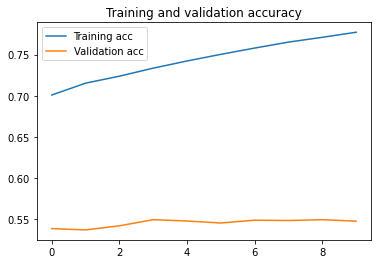

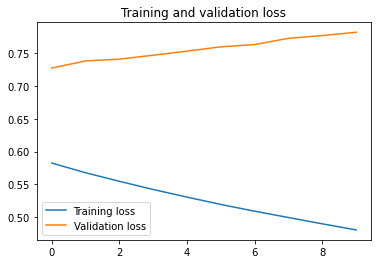

In [12]:
from matplotlib import pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

10- Check the accuracy and the loss of your models on the test dataset.

In [13]:
results1 = model.evaluate(x_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results1[0]))
print("Test Accuracy: {:.2f}%".format(results1[1] * 100))


    Test Loss: 0.79264
Test Accuracy: 54.00%


**Loss is 0.790 and Accuracy - 54% for simple RNN**

## Tuning The Vanilla RNN Network


11- Prepare the data to use sequences of length 80 rather than length 30 and retrain your model.  Did it improve the performance?

12- Try different values of the  maximum length of a sequence ("max_features").  Can you improve the performance?

13- Try smaller and larger sizes of the RNN hidden dimension.  How does it affect the model performance?  How does it affect the run time?

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 50)          1000000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 5)                 280       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,000,286
Trainable params: 1,000,286
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
47/47 [==============================] - 2s 24ms/step - loss: 0.6893 - acc: 0.5654 - val_loss: 0.6854 - val_acc: 0.5737
Epoch 2/10
47/47 [==============================] - 1s 19ms/step - loss: 0.6851 - acc: 0.5694 - val_loss: 0.6829 - val_acc: 0.5737
Epoch 3/10
47/47 [============================

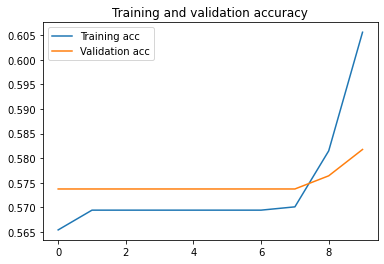

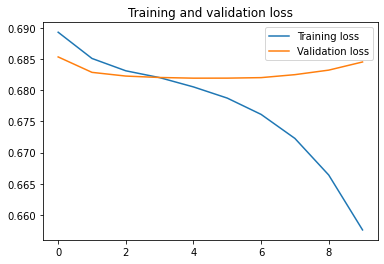

    Test Loss: 0.68735
Test Accuracy: 55.86%
12.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
%%timeit -n1 -r1
maxlen=80
num_words=20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,maxlen=maxlen)

x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

model=Sequential()
model.add(Embedding(num_words, 50))
model.add(SimpleRNN(5, kernel_initializer=initializers.RandomNormal(stddev=0.001)))
model.add(Dense(1,activation='sigmoid'))

model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc']
              )
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split = 0.2
                    )
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

results1 = model.evaluate(x_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results1[0]))
print("Test Accuracy: {:.2f}%".format(results1[1] * 100))

**Changing the sequence from 30 to 80 resulting in a similar accuracy level of 55% and time taken is 12s per loop**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 50)          2500000   
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 5)                 280       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2,500,286
Trainable params: 2,500,286
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 1s 195ms/step - loss: 0.6931 - acc: 0.6286 - val_loss: 0.6931 - val_acc: 0.4444
Epoch 2/10
2/2 [==============================] - 0s 51ms/step - loss: 0.6923 - acc: 0.6857 - val_loss: 0.6931 - val_acc: 0.4444
Epoch 3/10
2/2 [==============================] -

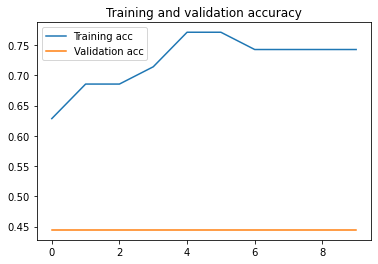

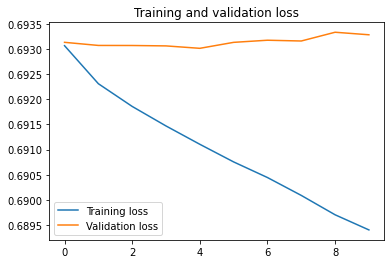

    Test Loss: 0.69250
Test Accuracy: 60.42%
3.67 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [16]:
%%timeit -n1 -r1
maxlen=30
num_words=50000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,maxlen=maxlen)


x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

model=Sequential()
model.add(Embedding(num_words, 50))
model.add(SimpleRNN(5, kernel_initializer=initializers.RandomNormal(stddev=0.001)))
model.add(Dense(1,activation='sigmoid'))

model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc']
              )
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split = 0.2
                    )
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

results1 = model.evaluate(x_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results1[0]))
print("Test Accuracy: {:.2f}%".format(results1[1] * 100))

**Increasing the max length to 50 , accuracy is a bit better at 60%. Time taken 3s per loop**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 50)          250000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 5)                 280       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 250,286
Trainable params: 250,286
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 1s 177ms/step - loss: 0.6931 - acc: 0.6000 - val_loss: 0.6932 - val_acc: 0.4444
Epoch 2/10
2/2 [==============================] - 0s 28ms/step - loss: 0.6926 - acc: 0.7429 - val_loss: 0.6935 - val_acc: 0.4444
Epoch 3/10
2/2 [==============================] - 0s 

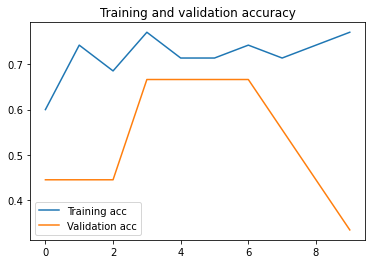

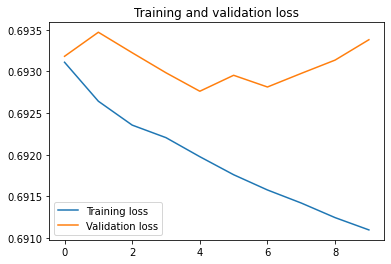

    Test Loss: 0.69372
Test Accuracy: 41.67%
3.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [17]:
%%timeit -n1 -r1
maxlen=30
num_words=5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,maxlen=maxlen)


x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

model=Sequential()
model.add(Embedding(num_words, 50))
model.add(SimpleRNN(5, kernel_initializer=initializers.RandomNormal(stddev=0.001)))
model.add(Dense(1,activation='sigmoid'))

model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc']
              )
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split = 0.2
                    )
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

results1 = model.evaluate(x_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results1[0]))
print("Test Accuracy: {:.2f}%".format(results1[1] * 100))

**Changing the maxlength and reducing it from 20000 to 5000 decreased accuracy by lot to 41.6%. Time taken for each loop is around 4s**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 50)          1000000   
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 3)                 162       
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,000,166
Trainable params: 1,000,166
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 1s 220ms/step - loss: 0.6932 - acc: 0.4857 - val_loss: 0.6928 - val_acc: 0.6667
Epoch 2/10
2/2 [==============================] - 0s 34ms/step - loss: 0.6929 - acc: 0.6571 - val_loss: 0.6927 - val_acc: 0.5556
Epoch 3/10
2/2 [==============================] -

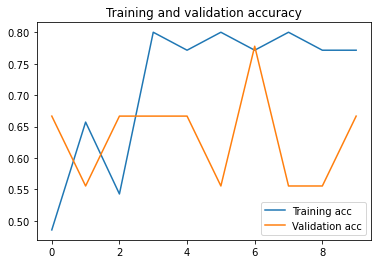

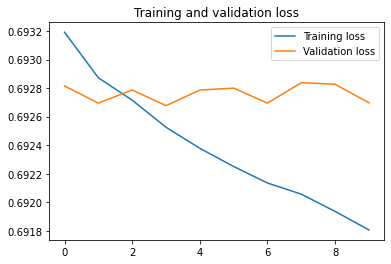

    Test Loss: 0.69344
Test Accuracy: 47.92%
4.12 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [18]:
%%timeit -n1 -r1
maxlen=30
num_words=20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,maxlen=maxlen)


x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

model=Sequential()
model.add(Embedding(num_words, 50))
model.add(SimpleRNN(3, kernel_initializer=initializers.RandomNormal(stddev=0.001)))
model.add(Dense(1,activation='sigmoid'))

model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc']
              )
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split = 0.2
                    )
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

results1 = model.evaluate(x_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results1[0]))
print("Test Accuracy: {:.2f}%".format(results1[1] * 100))

**Reducing the RNN hidden layer from 5 to 3, the accuracy decreased by quite a lot to 47.90% and time taken for loop is 4s**

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 50)          1000000   
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 15)                990       
                                                                 
 dense_10 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,001,006
Trainable params: 1,001,006
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 1s 169ms/step - loss: 0.6931 - acc: 0.4571 - val_loss: 0.6937 - val_acc: 0.2222
Epoch 2/10
2/2 [==============================] - 0s 29ms/step - loss: 0.6920 - acc: 0.8000 - val_loss: 0.6937 - val_acc: 0.3333
Epoch 3/10
2/2 [==============================] 

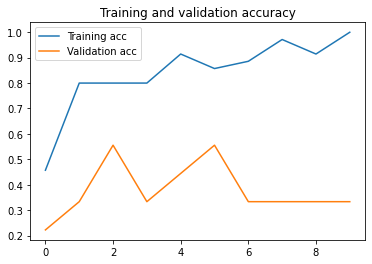

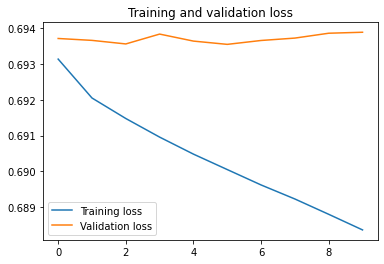

    Test Loss: 0.69282
Test Accuracy: 52.08%
3.61 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [23]:
%%timeit -n1 -r1
maxlen=30
num_words=20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,maxlen=maxlen)


x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

model=Sequential()
model.add(Embedding(num_words, 50))
model.add(SimpleRNN(15, kernel_initializer=initializers.RandomNormal(stddev=0.001)))
model.add(Dense(1,activation='sigmoid'))

model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc']
              )
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split = 0.2
                    )
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

results1 = model.evaluate(x_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results1[0]))
print("Test Accuracy: {:.2f}%".format(results1[1] * 100))

**Increasing the Rnn hidden layer to 15 the accuracy deducted to 52% and the time taken is 3.61s for each loop**

## Train LSTM and GRU networks


14- Build LSTM and GRU networks and compare their performance (accuracy and execution time) with the SimpleRNN. What is your conclusion?

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 50)          1000000   
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,029,505
Trainable params: 1,029,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 2s 391ms/step - loss: 0.6937 - acc: 0.5429 - val_loss: 0.6921 - val_acc: 0.6667
Epoch 2/10
2/2 [==============================] - 0s 57ms/step - loss: 0.6926 - acc: 0.6286 - val_loss: 0.6920 - val_acc: 0.5556
Epoch 3/10
2/2 [==============================] -

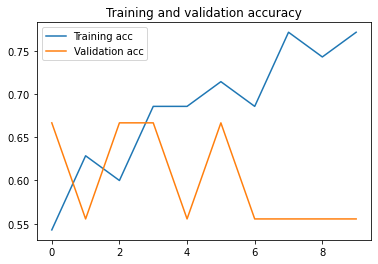

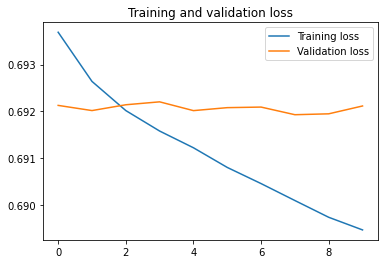

    Test Loss: 0.69352
Test Accuracy: 43.75%
5.08 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
%%timeit -n1 -r1
from keras.layers import  LSTM

maxlen=30
num_words=20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,maxlen=maxlen)

EMBED_DIM = 50
LSTM_OUT = 64

x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

model=Sequential()
model.add(Embedding(num_words, 50))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc']
              )
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split = 0.2
                    )
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

results1 = model.evaluate(x_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results1[0]))
print("Test Accuracy: {:.2f}%".format(results1[1] * 100))

**Training the LSTM model the accuracy is decreased to 43% and time to train also increased to 5s**

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 50)          1000000   
                                                                 
 gru (GRU)                   (None, 100)               45600     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,045,701
Trainable params: 1,045,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 2s 418ms/step - loss: 0.6930 - acc: 0.4857 - val_loss: 0.6950 - val_acc: 0.1111
Epoch 2/10
2/2 [==============================] - 0s 55ms/step - loss: 0.6922 - acc: 0.5714 - val_loss: 0.6949 - val_acc: 0.2222
Epoch 3/10
2/2 [==============================] -

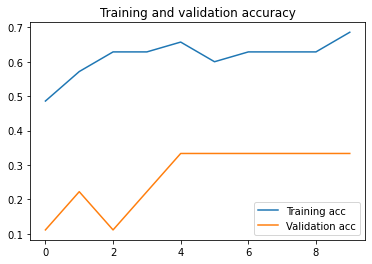

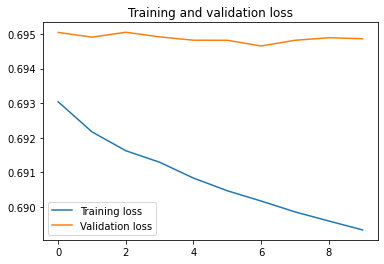

    Test Loss: 0.69261
Test Accuracy: 54.17%
5.12 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
%%timeit -n1 -r1
from keras.layers import GRU

maxlen=30
num_words=20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words,maxlen=maxlen)

EMBED_DIM = 50
LSTM_OUT = 64


x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

model=Sequential()
model.add(Embedding(num_words, 50))
model.add(GRU(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc']
              )
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split = 0.2
                    )
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

results1 = model.evaluate(x_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results1[0]))
print("Test Accuracy: {:.2f}%".format(results1[1] * 100))

**Training the GRU model the accuracy is around 54.17% and loop time is 5s per loop**